Estaremos viendo como implementar los backtests Iterativos, para posteriormente empezar a escribir el codigo de nuestro sistema de backtesting.

---

Necesitaremos el **spread** (diferencia entre el precio **Ask** y **Bid**).

- **ASK** *(Precio de venta)* - Es el precio más bajo para la venta.

- **BID** *(Precio de oferta)* - Es el precio más alto para la compra.

Primero descargaremos datos de dukascopy (porque necesitamos los precios BID y ASK para luego calcular el spread).

---

Con los 2 conjuntos de datos descargados (BID/ASK con el mismo inicio y final en el dataframe), podemos continuar.

In [1]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=2e51045ed7ed33f6fd02a283e32c2c38596081c0b32a7e918de06bededf6b9e1
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [3]:
import pandas as pd
import numpy as np
from ta.trend import SMAIndicator

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')

In [22]:
ruta_data_ask = '/content/drive/MyDrive/Colab Notebooks/EURUSD_Candlestick_1_D_ASK_27.02.2022-04.03.2022.csv'
ruta_data_bid = '/content/drive/MyDrive/Colab Notebooks/EURUSD_Candlestick_1_D_BID_27.02.2022-04.03.2022.csv'

In [23]:
# Veamos nuestros datos (para ver que tenemos que formatear mas adelante)
data_ask = pd.read_csv(ruta_data_ask)
data_ask.head()

,Gmt time,Open,High,Low,Close,Volume
0,31.01.2017 22:00:00.000,1.07979,1.08076,1.07317,1.07695,253310.7369
1,01.02.2017 22:00:00.000,1.07695,1.08290,1.07561,1.07584,249817.4295
2,02.02.2017 22:00:00.000,1.07584,1.07976,1.07134,1.07876,237801.1183
3,03.02.2017 22:00:00.000,1.07876,1.07876,1.07876,1.07876,0.0000
4,04.02.2017 22:00:00.000,1.07876,1.07876,1.07876,1.07876,0.0000


In [24]:
# Formateando y extrayendo los valores del ASK - Solo necesitamos la columna "Time" y "Close"
# IMPORTANTE: Usamos 'dayfirst = TRUE', para establecer el formato correcto YYYY-mm-dd
data_ask = pd.read_csv(ruta_data_ask, usecols=['Gmt time', 'Close'], parse_dates = ['Gmt time'], dayfirst = True, index_col = 'Gmt time')
data_ask.head()

,Close
Gmt time,
2017-01-31 22:00:00,1.07695
2017-02-01 22:00:00,1.07584
2017-02-02 22:00:00,1.07876
2017-02-03 22:00:00,1.07876
2017-02-04 22:00:00,1.07876


In [25]:
# Añadimos el sufijo 'Ask_' a todos los nombre en las Columnas
data_ask = data_ask.add_suffix('_Ask')
data_ask.head()

,Close_Ask
Gmt time,
2017-01-31 22:00:00,1.07695
2017-02-01 22:00:00,1.07584
2017-02-02 22:00:00,1.07876
2017-02-03 22:00:00,1.07876
2017-02-04 22:00:00,1.07876


In [26]:
# Importando y Formateando los valores BID
data_bid = pd.read_csv(ruta_data_bid, usecols=['Gmt time', 'Close'], parse_dates = ['Gmt time'], dayfirst = True, index_col = 'Gmt time')
data_bid = data_bid.add_suffix('_Bid')

In [27]:
data_bid.head()

,Close_Bid
Gmt time,
2017-01-31 22:00:00,1.07681
2017-02-01 22:00:00,1.07578
2017-02-02 22:00:00,1.07818
2017-02-03 22:00:00,1.07818
2017-02-04 22:00:00,1.07818


In [28]:
# Concatenando los Dos DataFrames
data = pd.concat([data_ask, data_bid], axis = 1, sort = False)
data

,Close_Ask,Close_Bid
Gmt time,,
2017-01-31 22:00:00,1.07695,1.07681
2017-02-01 22:00:00,1.07584,1.07578
2017-02-02 22:00:00,1.07876,1.07818
2017-02-03 22:00:00,1.07876,1.07818
2017-02-04 22:00:00,1.07876,1.07818
...,...,...
2022-03-01 22:00:00,1.11191,1.11179
2022-03-02 22:00:00,1.10674,1.10658
2022-03-03 22:00:00,1.09386,1.09311


In [29]:
# Obteniendo el Spread
data['Spread'] = data['Close_Ask'] - data['Close_Bid']
data

,Close_Ask,Close_Bid,Spread
Gmt time,,,
2017-01-31 22:00:00,1.07695,1.07681,0.00014
2017-02-01 22:00:00,1.07584,1.07578,0.00006
2017-02-02 22:00:00,1.07876,1.07818,0.00058
2017-02-03 22:00:00,1.07876,1.07818,0.00058
2017-02-04 22:00:00,1.07876,1.07818,0.00058
...,...,...,...
2022-03-01 22:00:00,1.11191,1.11179,0.00012
2022-03-02 22:00:00,1.10674,1.10658,0.00016
2022-03-03 22:00:00,1.09386,1.09311,0.00075


En el dataframe anterior, en algunas filas, se ve el spread = 0, esto puede deberse a la alta liquidez en esa sesión de Trading, también tengamos en cuenta que los datos extraidos de diferentes fuentes podrian tener ligeras diferencias en sus valores.

Ahora obtengamos un **precio medio** entre Ask y el Bid, asi podremos *intentar* simular mejor un mercado en vivo.

Ajustaremos un poco el spread (haciéndolo más parecido a un spread real)

In [30]:
data['Spread'] = data['Spread'] * 10
data

,Close_Ask,Close_Bid,Spread
Gmt time,,,
2017-01-31 22:00:00,1.07695,1.07681,0.0014
2017-02-01 22:00:00,1.07584,1.07578,0.0006
2017-02-02 22:00:00,1.07876,1.07818,0.0058
2017-02-03 22:00:00,1.07876,1.07818,0.0058
2017-02-04 22:00:00,1.07876,1.07818,0.0058
...,...,...,...
2022-03-01 22:00:00,1.11191,1.11179,0.0012
2022-03-02 22:00:00,1.10674,1.10658,0.0016
2022-03-03 22:00:00,1.09386,1.09311,0.0075


In [31]:
# Calculando un Precio Medio
data['Price'] = (data['Close_Ask'] + data['Close_Bid']) / 2
data.tail(2)

,Close_Ask,Close_Bid,Spread,Price
Gmt time,,,,
2022-03-04 22:00:00,1.09386,1.09311,0.0075,1.093485
2022-03-05 22:00:00,1.09386,1.09311,0.0075,1.093485


In [48]:
# En caso de que los valores tengan mas de 5 decimales,
# los podemos redondear a 5, ya que la mayoria de brokers usan 5 decimales
data = data.round(5)

# Guardando nuestro DataFrame

In [32]:
data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/[data_sets]/daily/EURUSD.csv')

# Ploteando los Datos

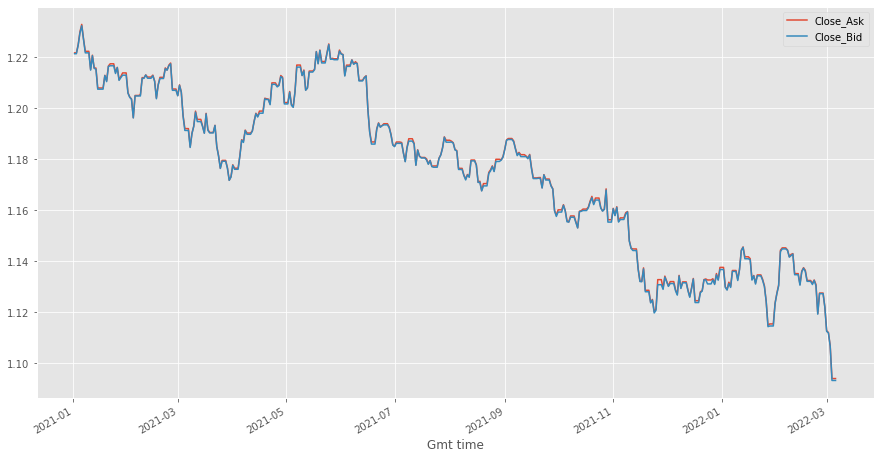

In [46]:
# data['Price'].plot(figsize=(15,8))
# plt.show()

data.loc['2021':'2022', ['Close_Ask', 'Close_Bid']].plot(figsize=(15,8))
plt.show()

# Como funciona un Backtesting Iterado

In [49]:
import time # Agregaremos 'time.sleep(1)' para poder ver cada iteracion con una separacion de 1 segundo
for vela in range(10):
  print(vela, data.index[vela].date(), data['Price'][vela], data['Spread'][vela], sep=' | ')
  time.sleep(1)

0 | 2017-01-31 | 1.07688 | 0.0014
1 | 2017-02-01 | 1.07581 | 0.0006
2 | 2017-02-02 | 1.07847 | 0.0058
3 | 2017-02-03 | 1.07847 | 0.0058
4 | 2017-02-04 | 1.07847 | 0.0058
5 | 2017-02-05 | 1.07498 | 0.0008
6 | 2017-02-06 | 1.06834 | 0.0007
7 | 2017-02-07 | 1.06988 | 0.0009
8 | 2017-02-08 | 1.06549 | 0.0009
9 | 2017-02-09 | 1.06412 | 0.003


In [56]:
data['sma_rapida'] = SMAIndicator(data['Price'], 50, True).sma_indicator()
data['sma_lenta'] = SMAIndicator(data['Price'], 200, True).sma_indicator()

In [57]:
data.head(2)

,Close_Ask,Close_Bid,Spread,Price,sma_rapida,sma_lenta
Gmt time,,,,,,
2017-01-31 22:00:00,1.07695,1.07681,0.0014,1.07688,1.076880,1.076880
2017-02-01 22:00:00,1.07584,1.07578,0.0006,1.07581,1.076345,1.076345


In [58]:
# Redondear 5 decimales
data = data.round(5)

En el siguiente codigo veremos el metodo **'{: f}'.format()** que envuelve **data['Spread'][vela]**, Es usado para evitar imprimir números en notación científica como: *4e-0*. Para entender mejor, la primera parte del loop tiene esta función y la segunda parte no, por lo que podemos ver la diferencia al imprimir.

In [59]:
posicion = 0
for vela in range(len(data)):
  if data['sma_rapida'].iloc[vela] > data['sma_lenta'].iloc[vela]:
    if posicion in [0, -1]: # Comprueba si la posicion es neutral (0) o short (-1). Esto evita ir Long dos veces
      print('{}: Posicion Long | Precio: {} | Spread: {}'.format(data.index[vela].date(), data['Price'][vela], data['Spread'][vela]))
      posicion = 1
  elif data['sma_rapida'].iloc[vela] < data['sma_lenta'].iloc[vela]:
    if posicion in[0, 1]: #Comprueba si la posicion es neutral (0) o Long (1). Esto evita ir a Short dos veces
      print('{}: Posicion Short | Precio: {} | Spread: {}'.format(data.index[vela].date(), data['Price'][vela], '{:f}'.format(data['Spread'][vela])))
      posicion = -1

2017-03-22: Posicion Short | Precio: 1.07836 | Spread: 0.001300
2017-04-13: Posicion Long | Precio: 1.06127 | Spread: 0.0043
2018-05-21: Posicion Short | Precio: 1.17788 | Spread: 0.000900
2020-01-11: Posicion Long | Precio: 1.11211 | Spread: 0.0091
2020-02-14: Posicion Short | Precio: 1.08315 | Spread: 0.003200
2020-06-14: Posicion Long | Precio: 1.13232 | Spread: 0.0007
2021-04-01: Posicion Short | Precio: 1.17624 | Spread: 0.004200
2021-05-21: Posicion Long | Precio: 1.21805 | Spread: 0.0054
2021-07-06: Posicion Short | Precio: 1.17906 | Spread: 0.001200


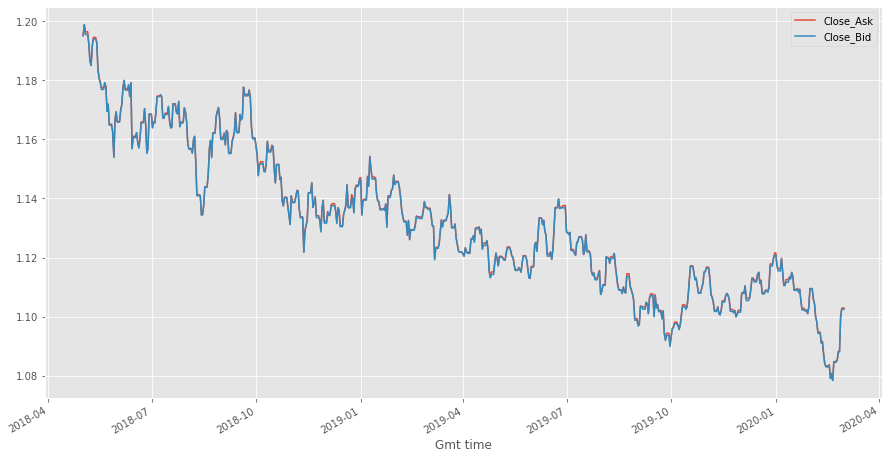

In [63]:
data.loc['2018-05':'2020-02', ['Close_Ask', 'Close_Bid']].plot(figsize=(15,8))
plt.show()

Hemos visto la base general de como funciona Backtesting Iterado o impulsado por eventos, es basicamente un loop que tomará decisiones a medida que pasa o itera por los datos, creando así una interaccion mas cercana al comportamiento del mercado real.

A continuacion, vamos a empaquetar la logica del backtesting iterado, junto a mas componentes, con los que podemos crear y testear varias estrategias sin tener que rehacer todo de nuevo.